In [8]:
# Imports
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T
import torchvision
import torch
import torch.nn as nn
from torchvision.utils import make_grid
from torchvision.utils import save_image
from IPython.display import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
%matplotlib inline


In [9]:
# Actual Dataloader

base_path = "images/"
train_path = "train-small/"
test_path = "test/"
batch_size = 64

tranform_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor(),
    T.RandomHorizontalFlip(p=0.5),
    T.RandomVerticalFlip(p=0.5),
    T.RandomAdjustSharpness(sharpness_factor=1.2, p=0.3)
])

tranform_j_tensor = transform = T.Compose([
    # you can add other transformations in this list
    T.ToTensor()
])

train_set = torchvision.datasets.ImageFolder(root=base_path + train_path, transform=tranform_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_set,
                                           batch_size=batch_size,
                                           shuffle=True)

test_set = torchvision.datasets.ImageFolder(root=base_path + test_path, transform=tranform_j_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_set,
                                           batch_size=batch_size,
                                           shuffle=False)




In [10]:
# Good Model Training

from model_2 import FakeNet2
from tqdm import tqdm


# initialize parameters
cnn = FakeNet2()
cnn.train()
iterations = 20
learning_rate = 0.001 

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# Train the Model
for epoch in tqdm(range(iterations)):
    for i, (images, labels) in enumerate(train_loader):
        
        # Forward + Backward + Optimize
        optimizer.zero_grad()
        outputs = cnn(images)
        labels = labels.unsqueeze(1).float()
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        if (i+1)%31 == 0:
            print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))


  0%|          | 0/20 [00:00<?, ?it/s]

  5%|▌         | 1/20 [00:08<02:50,  8.97s/it]

Epoch 1/20tensor(0.5234)


 10%|█         | 2/20 [00:17<02:39,  8.83s/it]

Epoch 2/20tensor(0.5395)


 15%|█▌        | 3/20 [00:25<02:27,  8.68s/it]

Epoch 3/20tensor(0.3245)


 20%|██        | 4/20 [00:34<02:17,  8.60s/it]

Epoch 4/20tensor(0.2421)


 25%|██▌       | 5/20 [00:42<02:07,  8.52s/it]

Epoch 5/20tensor(0.3583)


 30%|███       | 6/20 [00:50<01:58,  8.48s/it]

Epoch 6/20tensor(0.3860)


 35%|███▌      | 7/20 [00:59<01:49,  8.44s/it]

Epoch 7/20tensor(0.2523)


 40%|████      | 8/20 [01:07<01:40,  8.41s/it]

Epoch 8/20tensor(0.1877)


 45%|████▌     | 9/20 [01:16<01:32,  8.41s/it]

Epoch 9/20tensor(0.1334)


 50%|█████     | 10/20 [01:24<01:23,  8.39s/it]

Epoch 10/20tensor(0.3760)


 55%|█████▌    | 11/20 [01:32<01:15,  8.40s/it]

Epoch 11/20tensor(0.2127)


 60%|██████    | 12/20 [01:41<01:07,  8.39s/it]

Epoch 12/20tensor(0.1110)


 65%|██████▌   | 13/20 [01:49<00:58,  8.38s/it]

Epoch 13/20tensor(0.1715)


 70%|███████   | 14/20 [01:57<00:50,  8.39s/it]

Epoch 14/20tensor(0.2029)


 75%|███████▌  | 15/20 [02:06<00:41,  8.38s/it]

Epoch 15/20tensor(0.1617)


 80%|████████  | 16/20 [02:14<00:33,  8.41s/it]

Epoch 16/20tensor(0.1363)


 85%|████████▌ | 17/20 [02:23<00:25,  8.40s/it]

Epoch 17/20tensor(0.1103)


 90%|█████████ | 18/20 [02:31<00:16,  8.39s/it]

Epoch 18/20tensor(0.1550)


 95%|█████████▌| 19/20 [02:39<00:08,  8.39s/it]

Epoch 19/20tensor(0.0721)


100%|██████████| 20/20 [02:48<00:00,  8.41s/it]

Epoch 20/20tensor(0.1542)


In [11]:
# # NEW MODELS

# from model import FakeNet
# from tqdm import tqdm



# # initialize parameters
# cnn = FakeNet()
# cnn.train()
# iterations = 20
# learning_rate = 0.001 

# criterion = nn.BCELoss()
# optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)

# # Train the Model
# for epoch in tqdm(range(iterations)):
#     for i, (images, labels) in enumerate(train_loader):
        
#         # Forward + Backward + Optimize
#         optimizer.zero_grad()
#         outputs = cnn(images)
#         labels = labels.unsqueeze(1).float()
#         loss = criterion(outputs,labels)
#         loss.backward()
#         optimizer.step()

#         if (i+1)%31 == 0:
#             print("Epoch " + str(epoch+1) + "/" + str(iterations) + str(loss.data))

In [12]:
# Model Evaluation

cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var)
correct = 0
total = 0

for images, labels in test_loader:
    outputs = cnn(images)
    predicted = torch.round(outputs.data)
    total += labels.size(0)
    correct += (predicted.numpy().T == np.array(labels)).sum()
    if total % 256 == 0:
        print("Correct: ", correct, ", Total: ", total)
        
print('Test Accuracy of the model on test images: %.6f%%' % (100.0*correct/total))


Correct:  220 , Total:  256
Correct:  430 , Total:  512
Correct:  646 , Total:  768
Correct:  872 , Total:  1024
Correct:  1086 , Total:  1280
Correct:  1315 , Total:  1536
Correct:  1536 , Total:  1792
Correct:  1755 , Total:  2048
Correct:  1966 , Total:  2304
Correct:  2184 , Total:  2560
Correct:  2407 , Total:  2816
Correct:  2623 , Total:  3072
Correct:  2844 , Total:  3328
Correct:  3061 , Total:  3584
Correct:  3283 , Total:  3840
Correct:  3501 , Total:  4096
Correct:  3729 , Total:  4352
Correct:  3934 , Total:  4608
Correct:  4151 , Total:  4864
Correct:  4365 , Total:  5120
Correct:  4586 , Total:  5376
Correct:  4807 , Total:  5632
Correct:  5029 , Total:  5888
Correct:  5255 , Total:  6144
Correct:  5482 , Total:  6400
Correct:  5705 , Total:  6656
Correct:  5920 , Total:  6912
Correct:  6141 , Total:  7168
Correct:  6354 , Total:  7424
Correct:  6567 , Total:  7680
Correct:  6781 , Total:  7936
Correct:  7001 , Total:  8192
Correct:  7217 , Total:  8448
Correct:  7434 , 

In [14]:
# Loads data for trying the model on an image

list_tl = list(test_loader)

image_size = 32

path_real = 'images/test/REAL/'
img_names_real = os.listdir(path_real)

path_fake = 'images/test/FAKE/'
img_names_fake = os.listdir(path_fake)

batch_size = 10000


X_test_real = []
X_test_fake = []
for i in range(batch_size):
    name_real = img_names_real[i]
    img_name = path_real + name_real
    image = plt.imread(img_name)
    X_test_real.append(image)

    name_fake = img_names_fake[i]
    img_name = path_fake + name_fake
    image = plt.imread(img_name)
    X_test_fake.append(image)

test_imgs = X_test_real + X_test_fake
test_imgs = np.array(test_imgs)
print(f"Shape of training data: {test_imgs.shape}")
print(f"Data type: {type(test_imgs)}")


Shape of training data: (20000, 32, 32, 3)
Data type: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Actual Label: Real\nPredicted Label: Fake\nImage Number: 4894')

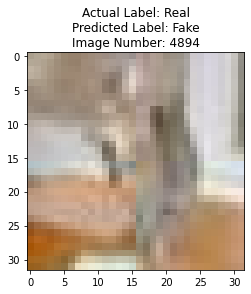

In [22]:
# This is where you test the model on images. The commented indices depending on model should fail
# in different ways to predict correctly

img_index = np.random.randint(10000, len(test_set))
# img_index = 4894
# img_index = 10755
real_label = "Real" if img_index < 10000 else "Fake"
predicted_label = torch.round(cnn(list_tl[img_index // 64][0]))[img_index % 64].detach().numpy()[0]
predicted_label = "Real" if predicted_label < 0.5 else "Fake"

plt.imshow(test_imgs[img_index])
plt.title("Actual Label: " + real_label + "\nPredicted Label: "
          + predicted_label + "\nImage Number: " + str(img_index))


In [18]:
# This is to set up image viewing

image_size = 32

path_real = 'images/train/REAL/'
img_names_real = os.listdir(path_real)

path_fake = 'images/train/FAKE/'
img_names_fake = os.listdir(path_fake)

batch_size = 1000


X_train_real = []
X_train_fake = []
for i in range(batch_size):
    name_real = img_names_real[i]
    img_name = path_real + name_real
    image = plt.imread(img_name)
    X_train_real.append(image)

    name_fake = img_names_fake[i]
    img_name = path_fake + name_fake
    image = plt.imread(img_name)
    X_train_fake.append(image)

X_train_real = np.array(X_train_real)
X_train_fake = np.array(X_train_fake)
print(f"Shape of training data: {X_train_real.shape}")
print(f"Data type: {type(X_train_real)}")

Shape of training data: (1000, 32, 32, 3)
Data type: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'Image Number Fake: 824')

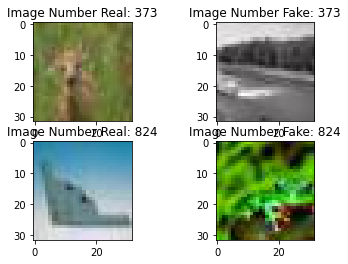

In [20]:
# This is to actually show some images


img_index = np.random.randint(0, batch_size)
img_2_index = np.random.randint(0, batch_size)


figure, axis = plt.subplots(2, 2) 

axis[0, 0].imshow(X_train_real[img_index], interpolation='nearest')
axis[0, 0].set_title("Image Number Real: " + str(img_index)) 
  
axis[0, 1].imshow(X_train_fake[img_index], interpolation='nearest')
axis[0, 1].set_title("Image Number Fake: " + str(img_index)) 
  
axis[1, 0].imshow(X_train_real[img_2_index], interpolation='nearest')
axis[1, 0].set_title("Image Number Real: " + str(img_2_index)) 
  
axis[1, 1].imshow(X_train_fake[img_2_index], interpolation='nearest')
axis[1, 1].set_title("Image Number Fake: " + str(img_2_index)) 
